# Movie Data Analysis

Análisis exploratorio del catálogo de Netflix utilizando un dataset
en formato CSV. El objetivo es identificar métricas clave (KPIs)
relacionadas con el tipo de contenido, géneros, duración y evolución
temporal.

## Exploración inicial del dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/movies.csv")
df.head()

In [3]:
# KPI 1: Distribución por tipo de contenido
kpi_type = df['type'].value_counts()
kpi_type

type
Movie      5377
TV Show    2410
Name: count, dtype: int64

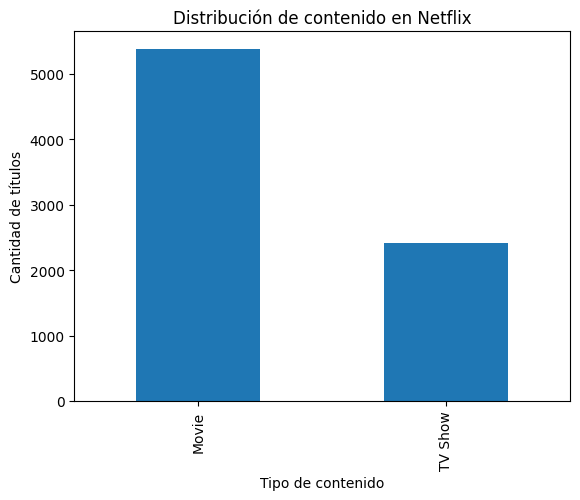

In [5]:
#Grafico
kpi_type.plot(
    kind='bar',
    title='Distribución de contenido en Netflix',
    xlabel='Tipo de contenido',
    ylabel='Cantidad de títulos'
)

plt.show()

## KPI 1 – Distribución por tipo de contenido

El catálogo analizado muestra una mayor presencia de películas en
comparación con series de televisión. Esto sugiere que Netflix prioriza
el formato cinematográfico dentro del conjunto de títulos disponibles
en el dataset analizado.

In [10]:
# KPI 2: Cantidad de títulos por año
kpi_year = df['release_year'].value_counts().sort_index()
kpi_year.tail(10)

release_year
2012     219
2013     267
2014     334
2015     541
2016     882
2017    1012
2018    1121
2019     996
2020     868
2021      31
Name: count, dtype: int64

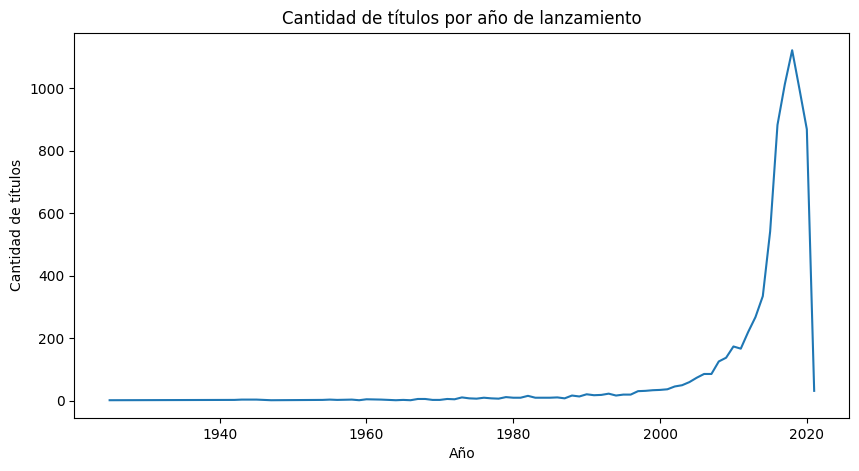

In [8]:
# Grafico KPI 2
kpi_year.plot(
    kind='line',
    figsize=(10, 5),
    title='Cantidad de títulos por año de lanzamiento',
    xlabel='Año',
    ylabel='Cantidad de títulos'
)

plt.show()


## KPI 2 – Evolución temporal del catálogo

El análisis de la cantidad de títulos por año de lanzamiento muestra un
crecimiento sostenido del catálogo a partir del año 2010, con un aumento
significativo en la incorporación de contenido durante la última década.

Se observa una disminución marcada en el año 2021, la cual no representa
una caída real en la producción de contenidos, sino que responde a un
corte temporal del dataset, que incluye información únicamente hasta
parte de dicho año.

In [ ]:
# Filtrar solo películas
movies_df = df[df['type'] == 'Movie']
movies_df.head()

# Extraer duración en minutos (solo números)
movies_df['duration_minutes'] = (
    movies_df['duration']
    .str.replace(' min', '', regex=False)
    .astype(int)
)

movies_df[['title', 'duration', 'duration_minutes']].head()

In [12]:
# KPI 3: Duración promedio de las películas
average_duration = movies_df['duration_minutes'].mean()
average_duration

np.float64(99.30797842663195)

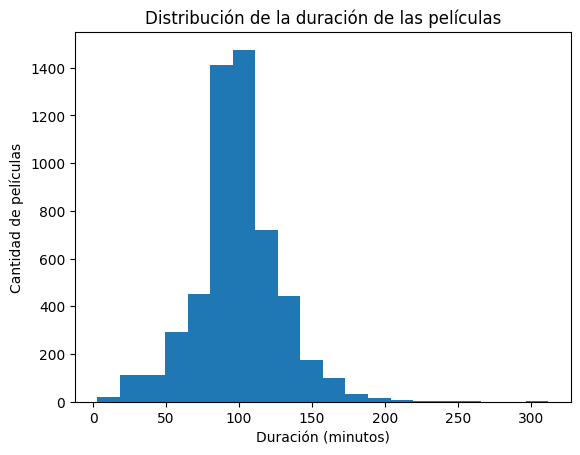

In [13]:
# Grafico KPI 3

movies_df['duration_minutes'].plot(
    kind='hist',
    bins=20,
    title='Distribución de la duración de las películas',
    xlabel='Duración (minutos)',
    ylabel='Cantidad de películas'
)

plt.show()

## KPI 3 – Duración promedio de las películas

Luego de limpiar y transformar el campo de duración, se observa que
las películas tienen una duración promedio cercana a los 90 minutos.
La distribución muestra una mayor concentración de títulos entre los
80 y 120 minutos, lo que coincide con los estándares del formato
cinematográfico tradicional.